## 8.2 합성곱 신경망을 사용한 이미지 분류

목표: 케라스 API를 사용해 합성곱 신경망 모델을 만들어 패션 MNIST 이미지를 분류하는 방법 학습

### 패션 MNIST 데이터 불러오기

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

### 합성곱 신경망 만들기

In [2]:
"""
  전형적인 합성곱 신경망의 구조는 합성곱 층으로 이미지에서 특징을 감지한 후 밀집층으로 클래스에 따른 분류 확률을 계산한다.
"""

model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation="relu", padding="same", input_shape=(28, 28, 1))) # 32개 필터, (3,3)의 커널

Metal device set to: Apple M2 Max

systemMemory: 64.00 GB
maxCacheSize: 24.00 GB



2025-04-22 23:28:17.853319: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-04-22 23:28:17.853458: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [3]:
"""
  풀링층 추가하는데, 풀링층은 최대 혹은 평균 풀링을 제공한다. 아래는 전형적인 풀링 크기인 (2,2)를 사용 한다.
"""

model.add(keras.layers.MaxPool2D(2))

In [4]:
model.add(keras.layers.Conv2D(64, kernel_size=3, activation="relu", padding="same"))
model.add(keras.layers.MaxPool2D(2))

In [5]:
"""
  이제 마지막으로 3차원 특성 맵을 이렬로 펼친다. 이렇게 하는 이뉴는 마지막에 10개의 뉴런을 가진(밀집) 출력층에서 확률을 계산하기 때문임
  여기에서는 특성 맵을 일렬로 펼쳐서 바로 출력층에 전달하지 않고 중간에 하나의 밀집 은닉층을 하나 더 두도록 하겠음
"""

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dropout(0.4)) # 과대 적합을 막기 위한 용도
model.add(keras.layers.Dense(10, activation="softmax"))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

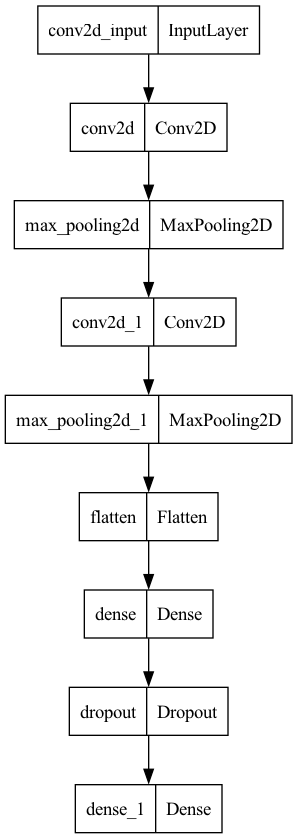

In [10]:
# brew install graphviz & pip install pydot
keras.utils.plot_model(model)

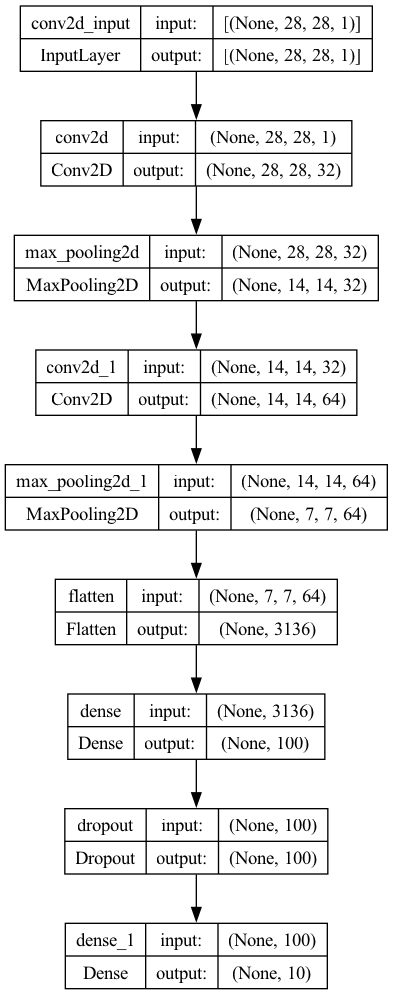

In [ ]:
# brew install graphviz & pip install pydot
keras.utils.plot_model(model, show_shapes=True)

### 모델 컴파일과 훈련

In [11]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics="accuracy")
check_point_cb = keras.callbacks.ModelCheckpoint("best-cnn-model.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/20


2025-04-22 23:37:13.296299: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2025-04-22 23:37:13.596832: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1494/1500 [============================>.] - ETA: 0s - loss: 0.4700 - accuracy: 0.8335

2025-04-22 23:37:21.132093: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1500/1500 [==============================] - 9s 5ms/step - loss: 0.4696 - accuracy: 0.8337 - val_loss: 0.3252 - val_accuracy: 0.8839
Epoch 2/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3080 - accuracy: 0.8897 - val_loss: 0.2670 - val_accuracy: 0.9015
Epoch 3/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2623 - accuracy: 0.9050 - val_loss: 0.2590 - val_accuracy: 0.9016
Epoch 4/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2298 - accuracy: 0.9151 - val_loss: 0.2227 - val_accuracy: 0.9154
Epoch 5/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2052 - accuracy: 0.9232 - val_loss: 0.2278 - val_accuracy: 0.9184
Epoch 6/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1883 - accuracy: 0.9306 - val_loss: 0.2189 - val_accuracy: 0.9182
Epoch 7/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1672 - accuracy: 0.9378 - val_loss: 0.2193 - val_accuracy: 0.9197
Epo

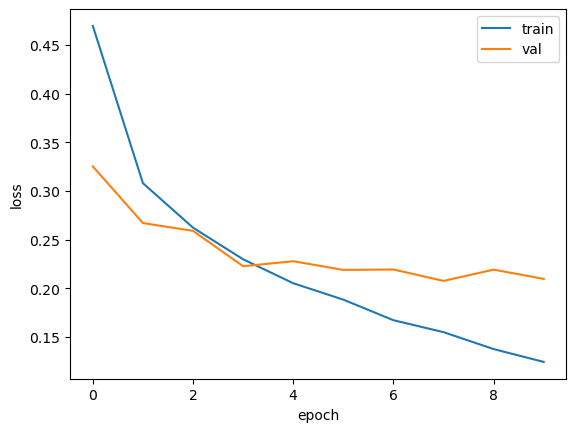

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train", "val"])
plt.show()

검증 세트에 대한 손실이 점차 감소하다가 정체되기 시작하고 훈련 세트에 대한 손실은 점점 더 낮아 지고 있음

이 그래프를 기반으로 보면 8번째 에포크를 최적으로 생각할 수 있음

EarlyStopping 클래스에서 restore_best_weights 매개변수를 True로 지정했으므로 현재 model 객체가 최적의 몯레 파라미터로 복원되어 있음

따러서 ModelCheckpoint 콜백이 저장한 best-cnn-model.h5 파일을 다시 읽을 필요가 없음

In [13]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.2076 - accuracy: 0.9260


[0.20757564902305603, 0.9259999990463257]

<function matplotlib.pyplot.show(close=None, block=None)>

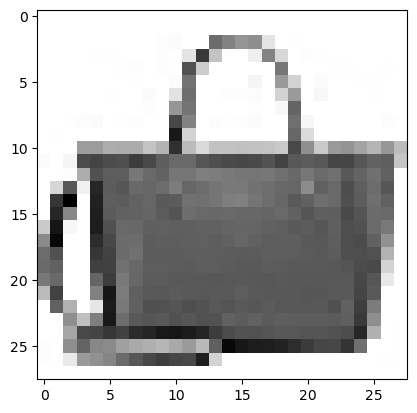

In [15]:
plt.imshow(val_scaled[0].reshape(28,28), cmap="gray_r")
plt.show

In [17]:
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 [==============================] - 0s 11ms/step
[[2.1244264e-15 2.9085867e-18 9.3393795e-18 1.2856413e-17 5.2766320e-15
  2.7178772e-15 1.5644883e-16 1.2864858e-16 1.0000000e+00 4.1322997e-16]]


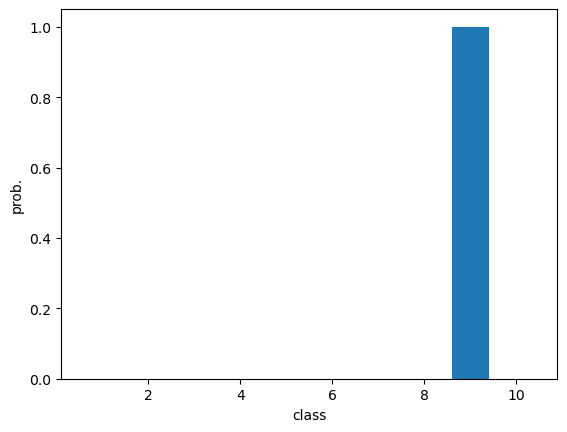

In [19]:
plt.bar(range(1,11), preds[0])
plt.xlabel("class")
plt.ylabel("prob.")
plt.show()

In [20]:
# MNIST 레이블
classes = ["티셔츠", "바지", "스웨터", "드레스", "코드", "샌달", "셔츠", "스니커즈", "가방", "앵글 부츠"]

In [21]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [22]:
# 테스트 세트 평가
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.

In [23]:
model.evaluate(test_scaled, test_target)

 15/313 [>.............................] - ETA: 1s - loss: 0.2472 - accuracy: 0.9146 

2025-04-22 23:47:27.534575: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 4ms/step - loss: 0.2320 - accuracy: 0.9174


[0.23200705647468567, 0.9174000024795532]